# CS4055 - Group 3

Brian Heaphy - 14160846

Zach Hyland -

Patrick Cruz -

Robert Laffan - 

Dataset: https://www.kaggle.com/lantanacamara/hong-kong-horse-racing#race-result-horse.csv

In [1]:
# Tools
from random import randint
import array
from collections import Counter

# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
# Read in dataset
df = pd.read_csv("race-result-horse.csv")

## Dataset Analysis

The dataset we've chosen to use for our project is a set of all Hong Kong horse races from 2013-2017.

Our ultimate goal will be to create a predicitive model using this dataset that can accurately predict who the winner of each race was.

Lets take a look at our dataset:

Below, we use df.info() to display how many records and features our dataset has, as well as the types of each feature.

+ We have 24151 records and 17 features.

Lets look at these features in more detail:

- finishing_position -> Where the horse finished after the race. This is what we will try to predict. We will drop it from the training dataset.
- horse_number -> The number given to the horse for the race. Not useful for our predicitive model.
- horse_name -> The name of the horse. This could be helpful. Perhaps a certain horse wins often.
- horse_id -> Basically the same as the horses name but in numerical format. We can chose one to work with.
- jockey - Who the rider of the horse was. Perhaps some jockeys get better horses and win more often?
- trainer - The horses trainer. Perhaps some trainers have better horses and have more winners.
- actual_weight - This is the total weight handicap given to a horse.
- draw -> The starting position of the horse. This may be useful. Perhaps certain starting positions are favourable.
- length_behind_winner -> The distance the horse finished behind 1st place. We will ignore this as our model will try to predict who the winner was without definitive information.
- running_position_1 -> The position of the horse at the first quarter of the race. This could be useful for our models.
- running_position_2 -> The position of the horse at halfway point of the race. This could be useful for our models.
- running_position_3 -> The position of the horse after the third quarter of the race. We may or may not include this.
- running_position_4 -> The position of the horse at the end of the race. We will ignore this.
- finish_time -> Time it took the horse to finish. We will likely remove this is at won't be much use with different race lengths and unknown conditions muddying its usefulness.
- win_odds -> The odds given to the horse to win the race. We may included this in our model or we can use this for comparisson with our own findings.
- race_id -> ID number given to the race. Not important for us.

In [3]:
# Here we can see the current data types of each field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 16 columns):
finishing_position      30187 non-null float64
horse_number            29851 non-null float64
horse_name              30189 non-null object
horse_id                30189 non-null object
jockey                  30160 non-null object
trainer                 30189 non-null object
actual_weight           30189 non-null object
draw                    29598 non-null float64
length_behind_winner    29598 non-null object
running_position_1      29574 non-null float64
running_position_2      29560 non-null float64
running_position_3      29542 non-null float64
running_position_4      16618 non-null float64
finish_time             29520 non-null object
win_odds                29598 non-null float64
race_id                 30189 non-null object
dtypes: float64(8), object(8)
memory usage: 3.7+ MB


In [4]:
df.describe()

,finishing_position,horse_number,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds
count,30187.000000,29851.000000,29598.000000,29574.000000,29560.000000,29542.000000,16618.000000,29598.000000
mean,6.979859,6.885397,6.862051,6.833942,6.831326,6.826992,6.942472,30.255274
std,3.830520,3.751176,3.742622,3.727267,3.725933,3.724886,3.798080,31.623839
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7.700000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,16.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,41.000000
max,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000,14.000000,99.000000


Above, we can see a few things.

- The most horses in any race was 14.
- The lowest odds given to any horse was 1/1
- The highest odds given to any horse was 99/1

It's also clear that a lot of features are missing here. In order to use a lot of this data for our machine learning algorithms, we will have to convert the features into numeric ones.


In [5]:
df.head(10)

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,race_id
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1.0,-,1.0,2.0,2.0,1.0,1.22.33,3.8,2014-001
1,2.0,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,13.0,2,8.0,9.0,9.0,2.0,1.22.65,8.0,2014-001
2,3.0,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,3.0,2,2.0,1.0,1.0,3.0,1.22.66,5.7,2014-001
3,4.0,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,2.0,2,6.0,4.0,5.0,4.0,1.22.66,6.1,2014-001
4,5.0,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,9.0,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,2014-001
5,6.0,9.0,WINNING ADVANTAGE,N359,A Suborics,A T Millard,123,11.0,5-1/2,12.0,13.0,13.0,6.0,1.23.20,24.0,2014-001
6,7.0,13.0,CARE FREE ELEGANCE,P340,C Y Ho,K L Man,115,12.0,5-1/2,4.0,3.0,3.0,7.0,1.23.22,99.0,2014-001
7,8.0,4.0,COOL PAL,S035,H W Lai,L Ho,129,8.0,5-3/4,5.0,6.0,6.0,8.0,1.23.25,21.0,2014-001
8,9.0,6.0,TAI PO FORTUNE,P081,K Teetan,T P Yung,127,6.0,6-1/4,7.0,7.0,7.0,9.0,1.23.33,10.0,2014-001
9,10.0,11.0,SUPER HORSE,L308,T H So,C W Chang,119,7.0,6-3/4,11.0,11.0,12.0,10.0,1.23.41,27.0,2014-001


From the table above we can see once again that a lot of data munging will be required to make some of the data usable. We can see that some features contain NaN values (i.e. not a number) and these will have to be cleaned up before we can start building our models.

### Lets see what's missing

In [6]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% Missing'])
missing_data.head(17)

,Total,% Missing
finishing_position,2,0.006625
horse_number,338,1.119613
horse_name,0,0.000000
horse_id,0,0.000000
jockey,29,0.096061
trainer,0,0.000000
actual_weight,0,0.000000
draw,591,1.957667
length_behind_winner,591,1.957667
running_position_1,615,2.037166


As you can see above, there are quite a few features with missing values. Luckily, many of them are easily fixed.

#### running_position_4
Nearly half of all records are missing data for this feature and as a result, it is best we remove it from our dataset.

#### horse_number
This data provides no benefit to us in creating a predicitive model so we can remove it from the dataset.

#### finishing_position
Since there are two rows missing the finishing position, we will remove them from the dataset.

#### jockey
There are 24 records where the jockey's name is missing. Since there are so few rows affected by this, we will simply remove them from the dataset.

#### length_behind_winner
Since we are trying to predict if a horse won it's race using other information, we will drop this column as there is a direct correlation between it and, winning or losing.

#### running_position_1, 2 and 3
This one requires a little more consideration than some of the others. We can see that there is roughly 2.03% of all records missing rp1 (running_position_1), roughly 2.08% missing rp2 and about 2.14% off all records missing rp3.

The likely scenario for this is that the horse did not make it to these stages, rather than the data being forgotten.

The missing % for rp1 and rp2 are so similar because they are most likely the result of horses refusing to run at the start of the race. The missing % for rp2 does not increase much in comparisson to rp1, because if a horse did start it is very unlikely to drop out before the halfway mark.

Finally, rp3 increases slightly more noticably as it would be more likely for a horse to drop out near the end of the race if it was in a poor position and had no chance of placing.

As a result of these considerations we will replace all of these missing values with '14', the lowest finishing position, as dropping out is essentially finishing in last place.

#### finish_time
We will drop finishing time from our dataset as it won't be much use when trying to create a predictive model. There may be many different race lengths which we can't account for, as well as things such as weather conditions that will make the finishing times worthless to us.

#### win_odds
In the case of missing odds values, we'll replace the null values with the mean win_odds.


### How it looks afterwards:

In [7]:
# Drop running position 4
df = df.drop(['running_position_4'], axis=1)

# Drop horse number
df = df.drop(['horse_number'], axis=1)

# Drop rows missing finishing position
df = df.dropna(axis=0, subset=['finishing_position'])
# Make finishing_position an int (was previosuly a float)
df['finishing_position'] = df['finishing_position'].astype(int)

# Drop rows missing jockey
df = df.dropna(axis=0, subset=['jockey'])

# Fill draw null vals with a random value from the draw col
df['draw'] = df['draw'].fillna(13)
df['draw'] = df['draw'].astype(int)

# Drop distance_behind_winner
df = df.drop(['length_behind_winner'], axis=1)

# Fill null running_position_1, 2 and 3 values with 14
df['running_position_1'] = df['running_position_1'].fillna(14)
df['running_position_2'] = df['running_position_2'].fillna(14)
df['running_position_3'] = df['running_position_3'].fillna(14)

# Drop finishing time
df = df.drop(['finish_time'], axis=1)

# Fill null win_odds with mean
df['win_odds'] = df['win_odds'].fillna(df['win_odds'].mean())

# We can drop race ID also as it wont be of any use to us
df = df.drop(['race_id'], axis=1)

# We can drop horse_name as horse_id will be more suitable
df = df.drop(['horse_name'], axis=1)

total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% Missing'])
missing_data.head(17)

,Total,% Missing
finishing_position,0,0.0
horse_id,0,0.0
jockey,0,0.0
trainer,0,0.0
actual_weight,0,0.0
draw,0,0.0
running_position_1,0,0.0
running_position_2,0,0.0
running_position_3,0,0.0
win_odds,0,0.0


## Reduce the size of the dataset

Due to the large size of the dataset with 30000 rows, we decided to reduce it's size in order to make it easier to manage and process for this project.

We will settle on 10000 rows.

In [8]:
df = df.head(10000)

In [9]:
# Split into training set and test set
# train_df, test_df = train_test_split(df, test_size=0.2)

## Features & Feature Engineering

### 1. Horse ID

In [10]:
horses = df['horse_id'].unique()
horses.size

1316


This tells us that in our dataset we have 1316 unique horses.


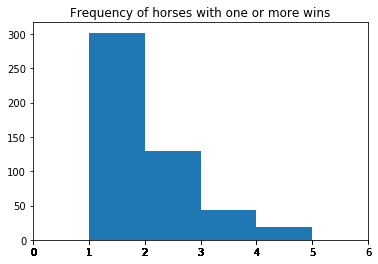

In [11]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for h in horses:
    w = 0
    for row in winners['horse_id']:
        if(h == row):
            w+=1

    wins.append(w)



plt.hist(wins, bins=[1,2,3,4,5], align='mid')
plt.title("Frequency of horses with one or more wins")
plt.gca().set_xticks(wins)
plt.show()

This shows us that some horses do have a history of more wins than others. 

Roughly 300 horses have won 1 race in our dataset.
Over 120 horses have won twice.
Almost 50 horses have won 3 times.
Just under 25 horses in the dataset have won 4 times.

Considering we have 1316 unique horses in our training set and roughly 300 horses with 1 win and 200 horses with at least 2 wins, we should be able to confidently say that a horse with 1 win or more is likely to win again. This should be a consideration for our model.

### Creating 'horse_wins'

In order to use the horse's wins as part of our calculations later on, we will create a new feature in the place of 'horse_id' and call it 'horse_wins'. The 'horse_wins' column will be much more suitable for designing a machine learning algorithm as the number of wins a horse has is more imidediately useful than it's id number.

Lets create 'horse_wins'.

In [12]:
# This makes a dict with the horse id corresponding to their wins
horse_win_dict = dict(zip(horses, wins))

df['horse_wins'] = df['horse_id']
df['horse_wins'] = df['horse_wins'].map(horse_win_dict)
df['horse_wins'] = df['horse_wins'].fillna(0)
df['horse_wins'] = df['horse_wins'].astype(int)

With our new feature 'horse_wins' successfully created, we can drop 'horse_id'.

In [13]:
df = df.drop(['horse_id'], axis=1)

### 2. Jockey

In [14]:
jockeys = df['jockey'].unique()
jockeys.size

61

As we can see above, our dataset contains 61 unique jockeys.

Lets take a look at their wins.

In [15]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for j in jockeys:
    w = 0
    for row in winners['jockey']:
        if(j == row):
            w+=1

    wins.append(w)


win_df = df.loc[df['finishing_position'] == 1]

jockey_wins = win_df[['jockey','finishing_position']]

jockey_wins.groupby('jockey').count().sort_values(['finishing_position'], ascending=False)

,finishing_position
jockey,
J Moreira,147
Z Purton,95
D Whyte,75
B Prebble,48
N Callan,47
G Mosse,37
C Y Ho,33
N Rawiller,29
K Teetan,29


Text(0.5, 0, 'jockey')

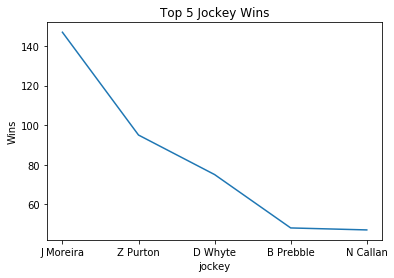

In [16]:
plt.plot(jockey_wins.groupby('jockey').count().sort_values(['finishing_position'], ascending=False).head(5))
plt.title('Top 5 Jockey Wins')
plt.ylabel('Wins')
plt.xlabel('jockey')

From examining the jockey data in the training set, we can determine that the rider of the horse can give us a large indication of whether or not the horse is likely to be a winner.

J Moreira for instance is the most decorated jockey with nearly 150 winners to his name. If we were to find his name down as the jockey for a horse then we could raise the likelyhood of that horse winning the race substantially.

The same can be said for the other jockeys seen in the top five above, with the jockey in 5th place, N Callan, having 47 wins.

### Creating 'jockey_wins'

Similar to what we did when creating 'horse_wins', we now need to find a way to convert a jockeys name into a numerical value to demonstrate their winning capabilities.

To do this we will follow the same steps as before.

In [17]:
# This makes a dict with jockeys and their corresponding wins
jockey_win_dict = dict(zip(jockeys, wins))

df['jockey_wins'] = df['jockey']
df['jockey_wins'] = df['jockey_wins'].map(jockey_win_dict)
df['jockey_wins'] = df['jockey_wins'].fillna(0)
df['jockey_wins'] = df['jockey_wins'].astype(int)

Once again, since we have now created a numerical value for identifying how good a horses jockey is, we no longer require the 'jockey' column.

In [18]:
df = df.drop(['jockey'], axis=1)

### 3. Trainer

Now we'll look at how the horses trainer may be related to their chances of winning.

In [19]:
trainers = df['trainer'].unique()
trainers.size

50

There are 50 unique trainers in the dataset.

Lets see how many wins each trainer has.

In [20]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for t in trainers:
    w = 0
    for row in winners['trainer']:
        if(t == row):
            w+=1

    wins.append(w)

win_df = df.loc[df['finishing_position'] == 1]

trainer_wins = win_df[['trainer','finishing_position']]

trainer_wins.groupby('trainer').count().sort_values(['finishing_position'], ascending=False)

,finishing_position
trainer,
J Moore,70
J Size,63
C Fownes,59
A S Cruz,45
C S Shum,43
P O'Sullivan,39
K L Man,37
K W Lui,36
Y S Tsui,36


Since wins among trainers are more normally distributed when compared to jockey's wins, we will take a different approach here and use categories to define trainers.

We will create the following categories:
0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70

### Creating 'trainer_wins'
#### Lets use categories

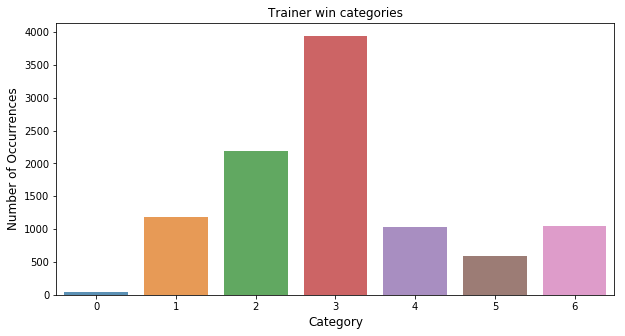

In [21]:
# This makes a dict with trainers and their corresponding wins
trainer_win_dict = dict(zip(trainers, wins))

df['trainer_wins'] = df['trainer']
df['trainer_wins'] = df['trainer_wins'].map(trainer_win_dict)
df['trainer_wins'] = df['trainer_wins'].fillna(0)
df['trainer_wins'] = df['trainer_wins'].astype(int)


# Create the categories for trainer_wins
df['trainer_wins'] = df['trainer_wins'].astype(int)
df.loc[ df['trainer_wins'] <= 10, 'trainer_wins'] = 0
df.loc[(df['trainer_wins'] > 11) & (df['trainer_wins'] <= 20), 'trainer_wins'] = 1
df.loc[(df['trainer_wins'] > 20) & (df['trainer_wins'] <= 30), 'trainer_wins'] = 2
df.loc[(df['trainer_wins'] > 30) & (df['trainer_wins'] <= 40), 'trainer_wins'] = 3
df.loc[(df['trainer_wins'] > 40) & (df['trainer_wins'] <= 50), 'trainer_wins'] = 4
df.loc[(df['trainer_wins'] > 50) & (df['trainer_wins'] <= 60), 'trainer_wins'] = 5
df.loc[(df['trainer_wins'] > 60) & (df['trainer_wins'] <= 70), 'trainer_wins'] = 6


trainer_count  = df['trainer_wins'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(trainer_count.index, trainer_count.values, alpha=0.8)
plt.title('Trainer win categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

We can now drop 'trainer' in favour of 'trainer_wins'.

In [22]:
df = df.drop(['trainer'], axis=1)

### 4. Actual Weight

We will next look at handicap weights given to horses to see if there is any trend between them and the winning horse.

In [23]:
handicaps = df['actual_weight'].unique()
handicaps.size

30

There are 30 different weight classes given to horses. Lets see how often they occur.

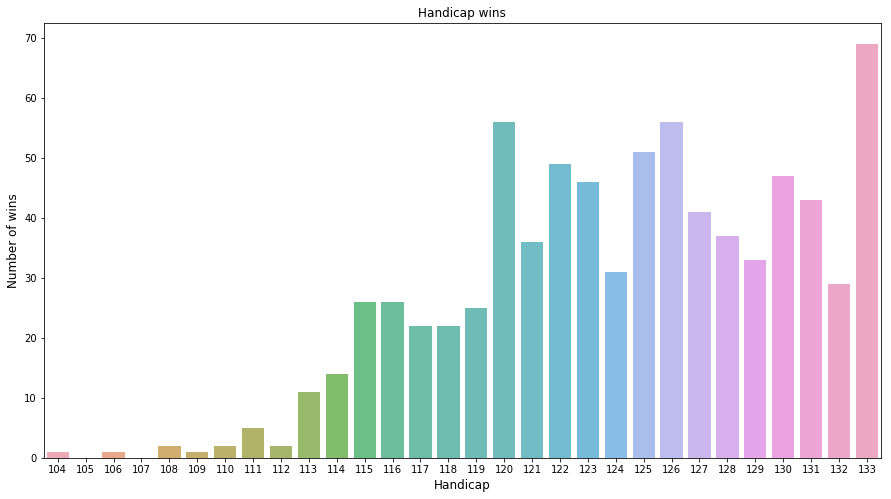

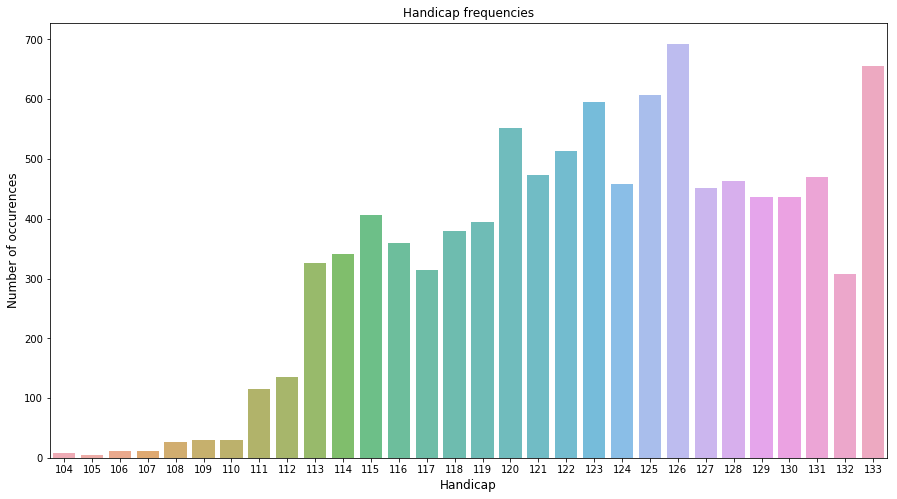

In [24]:
win_df = df.loc[df['finishing_position'] == 1]
wins = []

for h in handicaps:
    w = 0
    for row in win_df['actual_weight']:
        if(h == row):
            w+=1

    wins.append(w)

plt.figure(figsize=(15,8))
sns.barplot(handicaps, wins, alpha=0.8)
plt.title('Handicap wins')
plt.ylabel('Number of wins', fontsize=12)
plt.xlabel('Handicap', fontsize=12)
plt.show()

aw = df['actual_weight'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(aw.index, aw.values, alpha=0.8)
plt.title('Handicap frequencies')
plt.ylabel('Number of occurences', fontsize=12)
plt.xlabel('Handicap', fontsize=12)
plt.show()

#### Conclusion

The two charts above show us that there is no clear relationship between a handicap weight and winning the race.

Although horses given a handicap of 133 have won the most races, our second graph shows us that a handicap of 133 is the second most common handicap given to a horse. 

The overall match up of the two distributions allows us to conclude that the handicap is doing the job it was designed for. Levelling the playing field between horses. As a result of this, we will remove 'actual_weight' from our dataset.

In [25]:
df = df.drop(['actual_weight'], axis=1)

### 5. Draw

Next, we will evaluate the relationship between a horses drawn starting position and winning the race.

In [26]:
draws = df['draw'].unique()
draws.size

15

There are 15 unique possible draws.

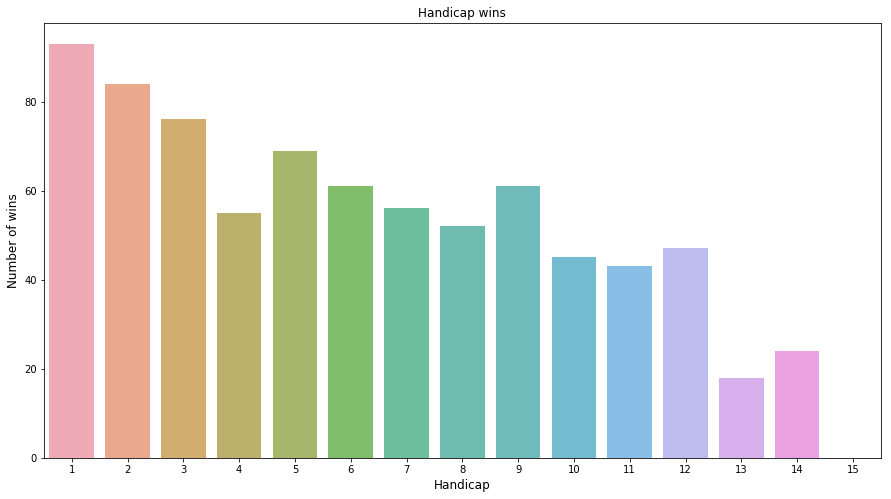

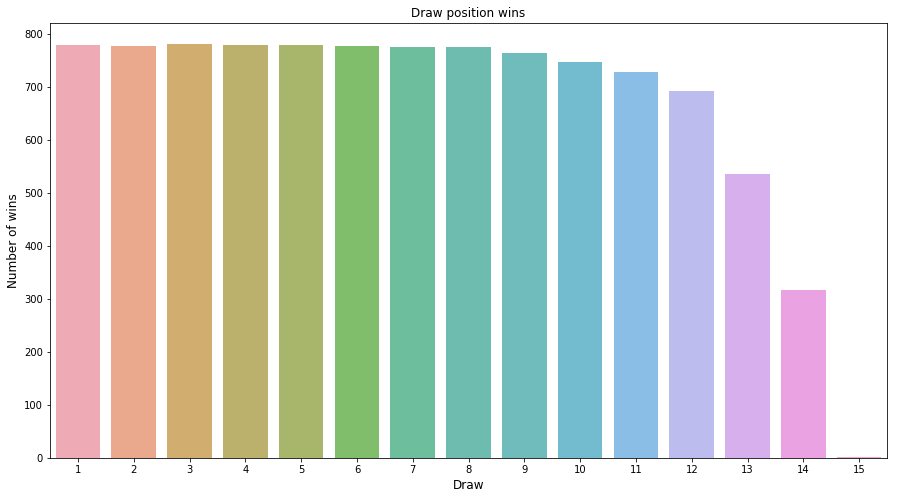

In [27]:
win_df = df.loc[df['finishing_position'] == 1]
wins = []

for d in draws:
    w = 0
    for row in win_df['draw']:
        if(d == row):
            w+=1

    wins.append(w)


draw_wins = win_df[['draw','finishing_position']]

plt.figure(figsize=(15,8))
sns.barplot(draws, wins, alpha=0.8)
plt.title('Handicap wins')
plt.ylabel('Number of wins', fontsize=12)
plt.xlabel('Handicap', fontsize=12)
plt.show()

d = df['draw'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(d.index, d.values, alpha=0.8)
plt.title('Draw position wins')
plt.ylabel('Number of wins', fontsize=12)
plt.xlabel('Draw', fontsize=12)
plt.show()